Algorithms for Data Mining 2018-2019 - SOLUTIONS <br>
Week 11 (28) - Workshop on Artificial Neural Networks <br>
Lecturer: Dr George Leontidis <br>
Demonstrators: Aiden Durrant and Deema Abdal Hafeth <br>

In [5]:
import math
import numpy
import random

# note that this only works for a single layer of depth
INPUT_NODES = 2
OUTPUT_NODES = 1
HIDDEN_NODES = 2

# 15000 iterations is a good point for playing with learning rate
MAX_ITERATIONS = 130000

# setting this too low makes everything change very slowly, but too high
# makes it jump at each and every example and oscillate. I found .5 to be good
LEARNING_RATE = .2

print ("Neural Network Program")

class network:
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        self.total_nodes = input_nodes + hidden_nodes + output_nodes
        self.learning_rate = learning_rate

        # set up the arrays
        self.values = numpy.zeros(self.total_nodes)
        self.expectedValues = numpy.zeros(self.total_nodes)
        self.thresholds = numpy.zeros(self.total_nodes)

        # the weight matrix is always square
        self.weights = numpy.zeros((self.total_nodes, self.total_nodes))

        # set random seed! this is so we can experiment consistently
        random.seed(10000)

        # set initial random values for weights and thresholds
        # this is a strictly upper triangular matrix as there is no feedback
        # loop and there inputs do not affect other inputs
        for i in range(self.input_nodes, self.total_nodes):
            self.thresholds[i] = random.random() / random.random()
            for j in range(i + 1, self.total_nodes):
                self.weights[i][j] = random.random() * 2

    def process(self):
        # update the hidden nodes
        for i in range(self.input_nodes, self.input_nodes + self.hidden_nodes):
            # sum weighted input nodes for each hidden node, compare threshold, apply sigmoid
            W_i = 0.0
            for j in range(self.input_nodes):
                W_i += self.weights[j][i] * self.values[j]
            W_i -= self.thresholds[i]
            self.values[i] = 1 / (1 + math.exp(-W_i))

        # update the output nodes
        for i in range(self.input_nodes + self.hidden_nodes, self.total_nodes):
            # sum weighted hidden nodes for each output node, compare threshold, apply sigmoid
            W_i = 0.0
            for j in range(self.input_nodes, self.input_nodes + self.hidden_nodes):
                W_i += self.weights[j][i] * self.values[j]
            W_i -= self.thresholds[i]
            self.values[i] = 1 / (1 + math.exp(-W_i))

    def processErrors(self):
        sumOfSquaredErrors = 0.0

        # we only look at the output nodes for error calculation
        for i in range(self.input_nodes + self.hidden_nodes, self.total_nodes):
            error = self.expectedValues[i] - self.values[i]
            #print error
            sumOfSquaredErrors += math.pow(error, 2)
            outputErrorGradient = self.values[i] * (1 - self.values[i]) * error
            #print outputErrorGradient

            # now update the weights and thresholds
            for j in range(self.input_nodes, self.input_nodes + self.hidden_nodes):
                # first update for the hidden nodes to output nodes (1 layer)
                delta = self.learning_rate * self.values[j] * outputErrorGradient
                #print delta
                self.weights[j][i] += delta
                hiddenErrorGradient = self.values[j] * (1 - self.values[j]) * outputErrorGradient * self.weights[j][i]

                # and then update for the input nodes to hidden nodes
                for k in range(self.input_nodes):
                    delta = self.learning_rate * self.values[k] * hiddenErrorGradient
                    self.weights[k][j] += delta

                # update the thresholds for the hidden nodes
                delta = self.learning_rate * -1 * hiddenErrorGradient
                #print delta
                self.thresholds[j] += delta

            # update the thresholds for the output node(s)
            delta = self.learning_rate * -1 * outputErrorGradient
            self.thresholds[i] += delta
        return sumOfSquaredErrors

class sampleMaker:
    def __init__(self, network):
        self.counter = 0
        self.network = network

    def setXor(self, x):
        if x == 0:
            self.network.values[0] = 1
            self.network.values[1] = 1
            self.network.expectedValues[4] = 0
        elif x == 1:
            self.network.values[0] = 0
            self.network.values[1] = 1
            self.network.expectedValues[4] = 1
        elif x == 2:
            self.network.values[0] = 1
            self.network.values[1] = 0
            self.network.expectedValues[4] = 1
        else:
            self.network.values[0] = 0
            self.network.values[1] = 0
            self.network.expectedValues[4] = 0

    def setNextTrainingData(self):
        self.setXor(self.counter % 4)
        self.counter += 1

# start of main program loop, initialize classes
net = network(INPUT_NODES, HIDDEN_NODES, OUTPUT_NODES, LEARNING_RATE)
samples = sampleMaker(net)

for i in range(MAX_ITERATIONS):
    samples.setNextTrainingData()
    net.process()
    error = net.processErrors()

    # prove that we got the right answers(ish)!
    if i > (MAX_ITERATIONS - 5):
        output = (net.values[0], net.values[1], net.values[4], net.expectedValues[4], error)
        print (output)

# display final parameters
print (net.weights)
print (net.thresholds)

Neural Network Program
(1.0, 1.0, 0.014929208005738361, 0.0, 0.00022288125167860235)
(0.0, 1.0, 0.98572950473676912, 1.0, 0.00020364703505789487)
(1.0, 0.0, 0.98562503368714638, 1.0, 0.00020663965649567642)
(0.0, 0.0, 0.016607849913409613, 0.0, 0.0002758206787463397)
[[ 0.          0.          5.75231929 -6.31595212  0.        ]
 [ 0.          0.         -5.97540997  6.18899346  0.        ]
 [ 0.          0.          0.          1.93019719  9.6814855 ]
 [ 0.          0.          0.          0.          9.57128428]
 [ 0.          0.          0.          0.          0.        ]]
[ 0.          0.          3.1933078   3.44466182  4.75885176]


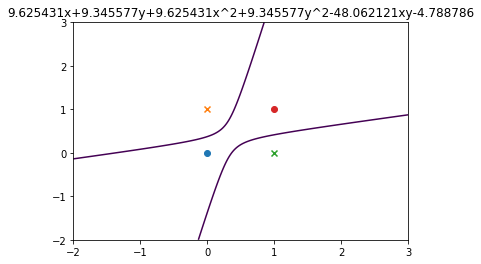

In [2]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDClassifier
#from sklearn.linear_model import Perceptron
 
X = []
y = []
for i in range(2):
    for j in range(2):
        X.append([i, j])
        y.append(i ^ j)
 
for x in X:
    x.extend([x[0]*x[0], x[1]*x[1], x[0]*x[1]])
 
X = np.array(X)
y = np.array(y)
 
clf = SGDClassifier(loss='log', n_iter=10, shuffle=False).fit(X, y)
#clf = Perceptron(n_iter=10, shuffle=False).fit(X, y)
 
if clf.score(X, y) != 1.0:
    print ('Failed to fit the data.')
    sys.exit(1)
 
plt.title("%fx%+fy%+fx^2%+fy^2%+fxy%+f" % (clf.coef_[0, 0], clf.coef_[0, 1],
            clf.coef_[0, 2], clf.coef_[0, 3], clf.coef_[0, 4],
            clf.intercept_))
 
for i in range(len(y)):
    if y[i] == 1:
        plt.scatter(X[i, 0], X[i, 1], marker=u'x')
    if y[i] == 0:
        plt.scatter(X[i, 0], X[i, 1], marker=u'o')
 
XX, YY = np.mgrid[-2:3:200j, -2:3:200j]
XXX = []
for xs, ys in zip(XX, YY):
    for x_, y_ in zip(xs, ys):
        XXX.append([x_, y_, x_*x_, y_*y_, x_*y_])
Z = clf.decision_function(XXX)
 
Z = Z.reshape(XX.shape)
plt.contour(XX, YY, Z, levels=[0])
plt.show()